**Experiment 12**

Using CNN for Image ClassificatioN

Loading Cifar-10 dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Flatten, Dense
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


Using ImageDataGenerator for Real-time data augmentation

In [ ]:
img_gen = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range = 30, rescale = 1./255)
train_gen = img_gen.flow(x_train, y_train, batch_size = 32)
test_gen = img_gen.flow(x_test, y_test)

Building a CNN Model for Image Classification

In [ ]:
model = models.Sequential()
#Your input is of  32 x 32 x 3 dimensions
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3) ,padding="same" ))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_12 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 64)      

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = x_train.shape[0] // 32
r = model.fit(train_gen, steps_per_epoch=steps_per_epoch,
                    validation_data=test_gen, epochs = 20)

Epoch 1/20
1562/1562 [==============================] - 47s 30ms/step - loss: 1.4305 - accuracy: 0.1006 - val_loss: 2.1505 - val_accuracy: 0.0212
Epoch 2/20
1562/1562 [==============================] - 44s 28ms/step - loss: 1.0951 - accuracy: 0.1011 - val_loss: 1.1843 - val_accuracy: 0.1078
Epoch 3/20
1562/1562 [==============================] - 44s 28ms/step - loss: 0.9615 - accuracy: 0.1023 - val_loss: 0.9931 - val_accuracy: 0.0915
Epoch 4/20
1562/1562 [==============================] - 48s 31ms/step - loss: 0.8805 - accuracy: 0.1020 - val_loss: 1.0999 - val_accuracy: 0.0707
Epoch 5/20
1562/1562 [==============================] - 44s 28ms/step - loss: 0.8194 - accuracy: 0.1030 - val_loss: 1.2473 - val_accuracy: 0.0377
Epoch 6/20
1562/1562 [==============================] - 47s 30ms/step - loss: 0.7695 - accuracy: 0.1020 - val_loss: 1.0175 - val_accuracy: 0.0792
Epoch 7/20
1562/1562 [==============================] - 45s 29ms/step - loss: 0.7334 - accuracy: 0.1022 - val_loss: 1.1080 -

In [ ]:
model.evaluate(test_gen)

313/313 [==============================] - 7s 23ms/step - loss: 0.7532 - accuracy: 0.0892


[0.7531626224517822, 0.08919999748468399]

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_12 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 64)      

In [ ]:
#Save your model
model.save("/content/sample_data/PES1UG20CS516.h5")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 re_lu_12 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 64)      

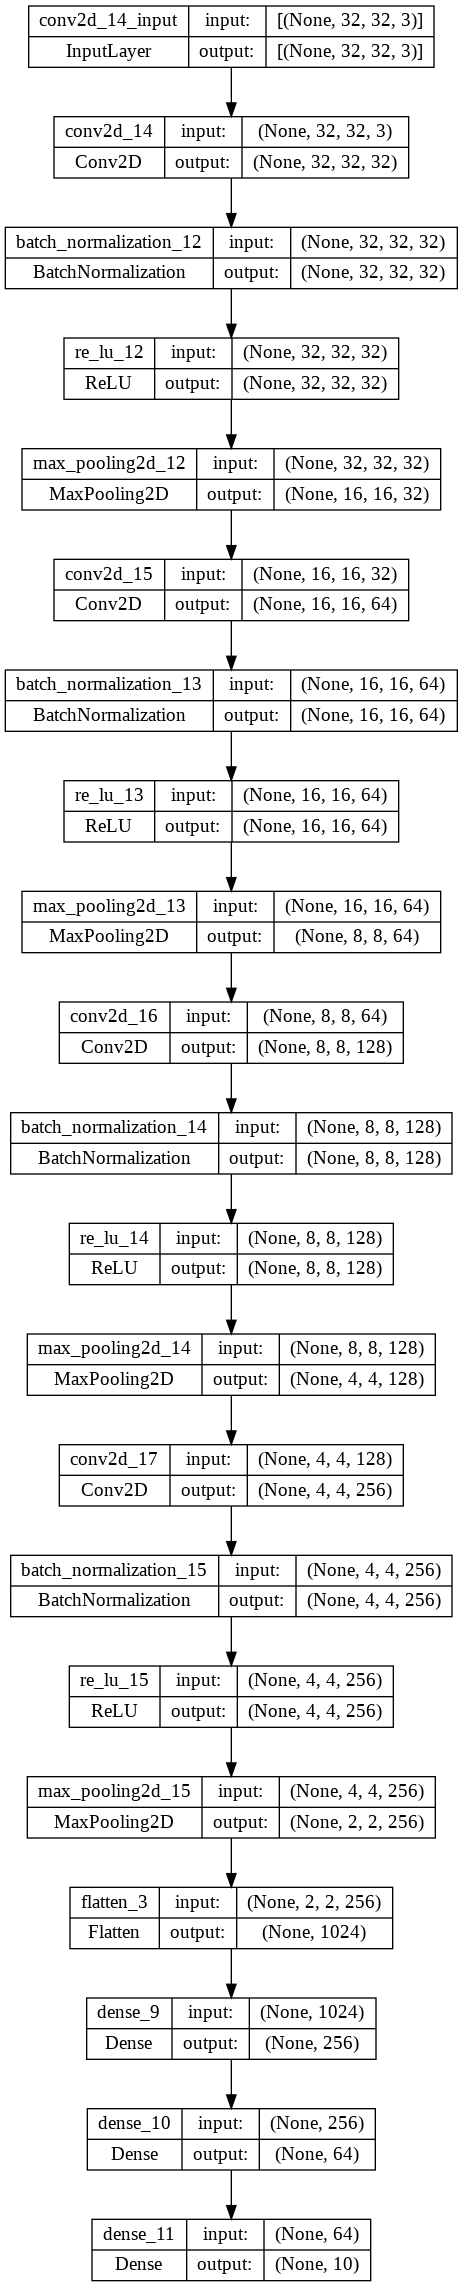

In [ ]:
#For your Verification Purposes:
model_n=tf.keras.models.load_model("/content/sample_data/PES1UG20CS516.h5") # "SRN.h5"
model_n.summary()

#Verify your model using this i.e ,if the Image generated after this matches the Flow chart Image in PDF file then your output is most likely correct
tf.keras.utils.plot_model(model, to_file="/content/sample_data/my_model.png", show_shapes=True)